# Prosper Loans
## by Ahmed Gharib

## Investigation Overview

In this investigation I wanted to look at what affects the Borrower APR and how other features affect the loan status.

## Dataset Overview

#### About Prosper

From the [Prosper](https://www.prosper.com/) website. Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $17 billion in loans to more than 1,030,000 people.

[Prosper Loan Dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1602316069250000&usg=AOvVaw3v_Fjzy60OI_JxN1zu63ds) (Last update 03/11/2014)

- This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Setting up the general theme of charts and color palette to use
sns.set_theme(style='white', palette='Set2')
base_color = '#00334e'
title_font = {'fontsize': 20, 'fontweight':'bold'}
axis_font = {'fontsize': 14}

# To display charts in the same notebook
%matplotlib inline

# Pandas diplay options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv('data/cleaned_prosper.csv', parse_dates=['ListingCreationDate'])

In [3]:
# Dictionary of ordered categories
cat_dict = {'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999',
                            '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
            'Term': [12, 36, 60]}

# List of columns to convert
cat_cols = ['EmploymentStatus', 'LoanStatus', 'ListingCategory', 'BorrowerState', 'Occupation']

# Converting ordered categories columns 

for col in cat_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_dict[col])
    loan_clean[col] = loan_clean[col].astype(ordered_cat)
    
# Converting other categorical clomuns

for col in cat_cols:
    loan_clean[col] = loan_clean[col].astype('category')

In [4]:
loan_clean.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,AvgCreditScore
0,2007-08-26 19:09:29.263,36,Completed,0.16516,nan,Not Available,CO,Other,Self-employed,2.00000,True,"$25,000-49,999",0,9425,649.50000
1,2007-01-05 15:00:47.090,36,Completed,0.28269,nan,Not Available,GA,Other,Not available,nan,False,Not displayed,0,3001,489.50000
2,2012-10-22 11:02:35.010,36,Current,0.12528,9.00000,Motorcycle,GA,Skilled Labor,Employed,113.00000,True,"$25,000-49,999",0,10000,809.50000
3,2013-09-14 18:38:39.097,36,Current,0.24614,4.00000,Home Improvement,MN,Executive,Employed,44.00000,True,"$100,000+",0,15000,689.50000
4,2013-12-14 08:26:37.093,60,Current,0.15425,10.00000,Debt Consolidation,NM,Professional,Employed,82.00000,True,"$100,000+",0,15000,749.50000


## Borrower APR Distribution

The distribution of `BorrowerAPR` is approximatly normal with a mean of 22.26%, median of 21.47%, minmun rate of 0.65% and maximum of 51.23%. and most of the values ranges between 10% and 45% with a peak around 35%

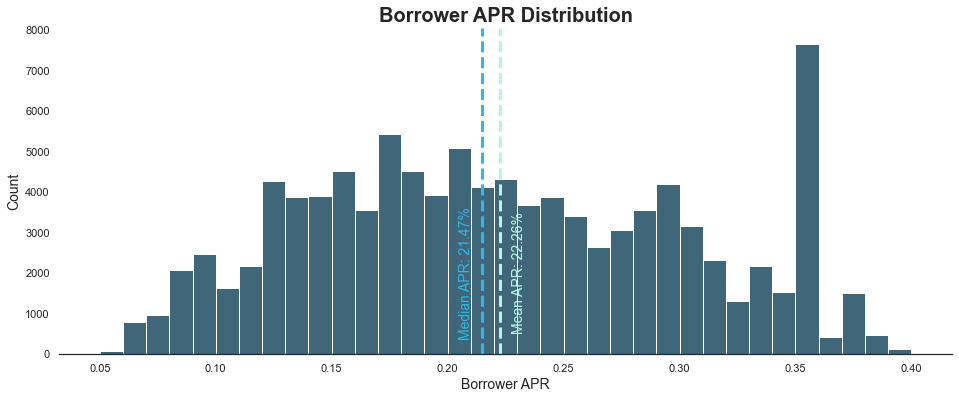

In [5]:
# Calculating the median and mean for BorrowerAPR to plot them
median_apr = loan_clean.BorrowerAPR.median()
mean_apr = loan_clean.BorrowerAPR.mean()

# Ploting the distribution of BorrowerAPR
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(loan_clean.BorrowerAPR, kde=False, color=base_color, binwidth=0.01, ax=ax, binrange=[0.05, 0.4])
sns.despine(left=True)
plt.axvline(x=median_apr, color='#33b5e5', linewidth=3, ls='--')
plt.text(median_apr - 0.01, 2000, f'Median APR: {median_apr:.2%}',
         va="center", rotation=90, family='sans-serif', size=14, color='#33b5e5')
plt.axvline(x=mean_apr, color='#b5f5e5', linewidth=3, ls='--')
plt.text(mean_apr + 0.005, 2000, f'Mean APR: {mean_apr:.2%}', 
         va="center", rotation=90, family='sans-serif', size=14, color='#b5f5e5')
plt.title('Borrower APR Distribution', fontdict=title_font)
plt.xlabel('Borrower APR', fontdict=axis_font)
plt.ylabel('Count', fontdict=axis_font);

## Loan Status Distribution

About 81% of all Prosper loans are current or completed. However, Prosper had approximately 16% of its loans defaulted or charged-off. Susgesting that Prosper company should improve customers analysis before granting loans.

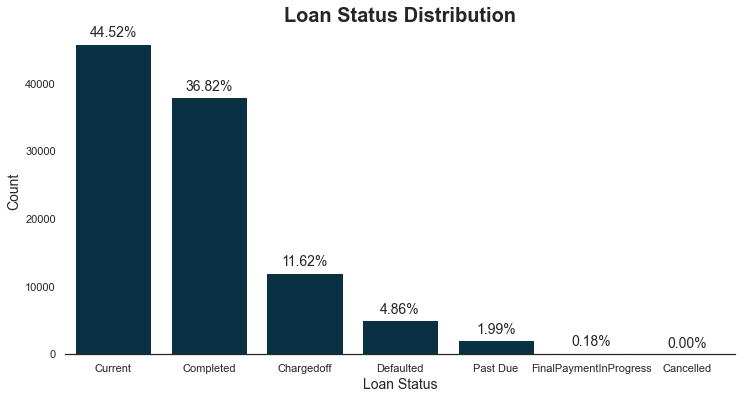

In [6]:
# Ploting the distribution of LoanStatus
status_counts = loan_clean.LoanStatus.value_counts()
prop_string = [f'{p/loan_clean.shape[0]:.2%}' for p in status_counts]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=loan_clean, x='LoanStatus', color=base_color, ax=ax, order=status_counts.index)
sns.despine(left=True)
for i, c in enumerate(status_counts):
    plt.text(i, c+1000, prop_string[i], ha='center', size=14)
plt.title('Loan Status Distribution', fontdict=title_font)
plt.xlabel('Loan Status', fontdict=axis_font)
plt.ylabel('Count', fontdict=axis_font);

## The relation between the numeric variables

based on the correlation matrix we find that:
- There is a postive relatioship between `ProsperScore` , `AvgCreditScore` and `LoanOriginalAmount`.
- There is a negative relationship between `BorrowerAPR` and those 3 variables (`ProsperScore` , `AvgCreditScore` and `LoanOriginalAmount`).

we can expect that the higher the average credit score the higher the prosper score and loan amount and the lower the borrower APR.

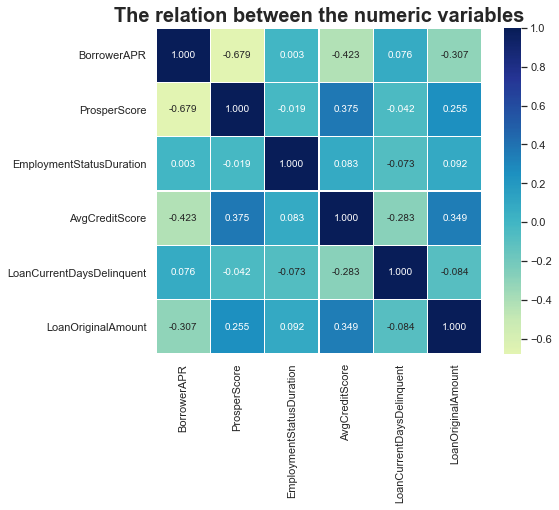

In [7]:
# Listing the numeric variables
num_cols = ['BorrowerAPR', 'ProsperScore', 'EmploymentStatusDuration', 
            'AvgCreditScore', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount']
# Heatmap Plot
plt.figure(figsize=(8, 6))
sns.heatmap(loan_clean[num_cols].corr(),
            annot=True,
            fmt='.3f',
            cmap='YlGnBu',
            center=0,
            linewidths=.5,
            square=True)
plt.title('The relation between the numeric variables', fontdict=title_font);

## Distribution of Loan Status by Income Range
- Most of Defaulted Loans their Income Range wasn't displayed.
- Most of Current Loans are for individuals with Income Range more than $25,000.

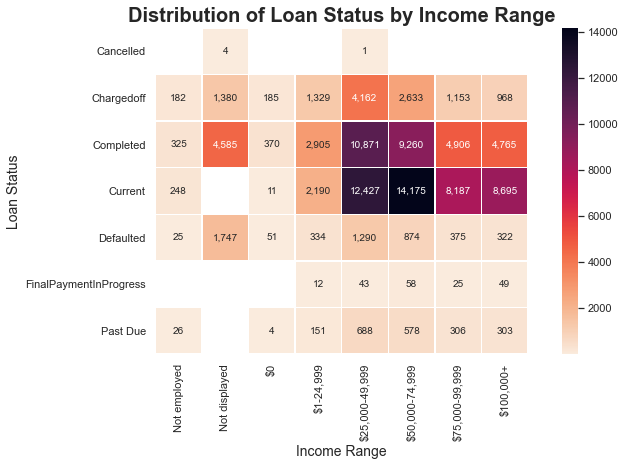

In [8]:
# Preparing for HeatMap plot 
df_loan_income = loan_clean.groupby(['LoanStatus', 'IncomeRange']).count()['ListingCreationDate'].reset_index()
df_loan_income.columns = ['LoanStatus', 'IncomeRange', 'Count']
df_loan_income = df_loan_income.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'Count').fillna(0)

# Heatmap Plot
plt.figure(figsize=(12, 6))
sns.heatmap(df_loan_income,
            annot=True,
            fmt=',.0f',
            cmap='rocket_r',
            mask=(df_loan_income<0.5),
            linewidths=.5,
            square=True)
plt.title('Distribution of Loan Status by Income Range', fontdict=title_font)
plt.xlabel('Income Range', fontdict=axis_font)
plt.ylabel('Loan Status', fontdict=axis_font);

#### The Relation between EmploymentStatus, LoanStatus and BorrowerAPR

- Not employed idividuals have the highest APR for current loans suggesting that now Prosper company consider them the highest risk and the lowest rate for employed individuals.

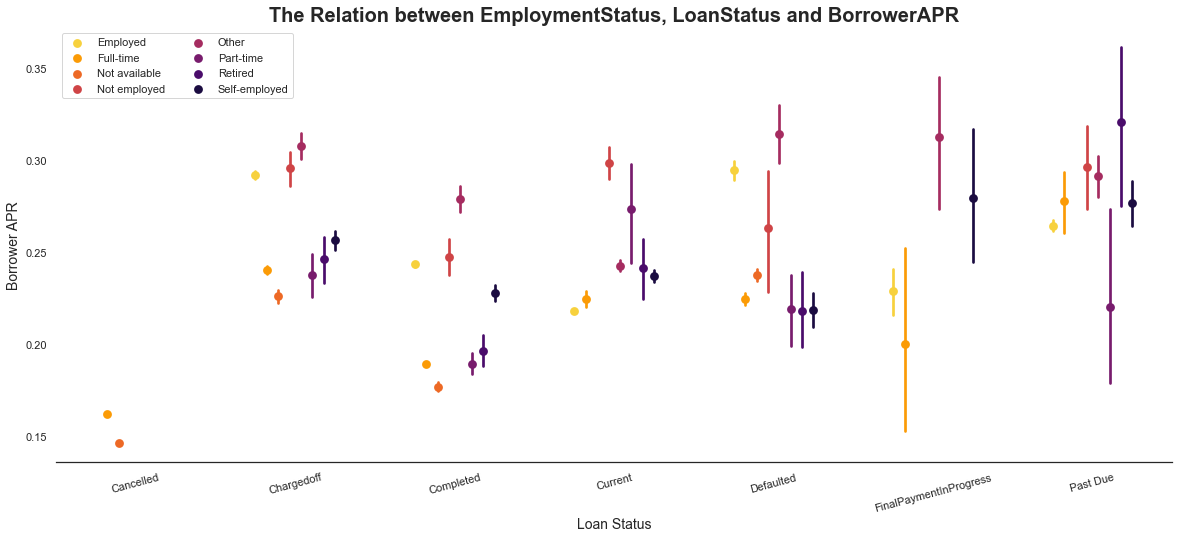

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = sns.pointplot(data=loan_clean,
                   x='LoanStatus',
                   y='BorrowerAPR',
                   hue='EmploymentStatus',
                   linestyles="",
                   dodge=0.5,
                   palette='inferno_r')
sns.despine(left=True)
plt.title('The Relation between EmploymentStatus, LoanStatus and BorrowerAPR', fontdict=title_font)
plt.xlabel('Loan Status', fontdict=axis_font)
plt.ylabel("Borrower APR", fontdict=axis_font)
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();